# Capstone Project 
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Lifestyle and Learning – Predicting Student Performance </span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 2 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">INTRODUCTION</span>
#### In this capstone project, we studied how students' habits affect their exam scores. Using data from 1,000 students, we look at study time, sleep, screen use, diet, and mental health. We use data science methods like analysis, and clustering to find patterns and build models. The goal is to give helpful advice to students and show how machine learning can be used in education.

<span style="color:rgb(21, 40, 163); font-weight: bold">1. Problem Definition</span>

In today's academic environment, student performance is influenced not only by classroom instruction but also by various lifestyle habits such as study routines, sleep patterns, screen time, diet, and mental well-being. Understanding how these habits impact academic outcomes can help students optimize their lifestyles for better results.

**Research Question:**  
How do lifestyle habits affect student academic performance, and can we build machine learning models to accurately predict final exam scores based on these habits?

<span style="color:rgb(21, 40, 163); font-weight: bold">2. Data Understanding and Preprocessing </span>

In [ ]:
# System & Display Settings
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

import pandas as pd
import numpy as np
import math

# Pandas display formatting
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    make_scorer
)

# Model Validation
from sklearn.model_selection import train_test_split, cross_val_score


In [40]:
# Load Data
df = pd.read_csv('student_habits_performance(in).csv')
print("Data Shape:", df.shape)
display(df.head())

Data Shape: (1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.00,1.20,1.10,No,85.00,8.00,Fair,6,Master,Average,8,Yes,56.20
1,S1001,20,Female,6.90,2.80,2.30,No,97.30,4.60,Good,6,High School,Average,8,No,100.00
2,S1002,21,Male,1.40,3.10,1.30,No,94.80,8.00,Poor,1,High School,Poor,1,No,34.30
3,S1003,23,Female,1.00,3.90,1.00,No,71.00,9.20,Poor,4,Master,Good,1,Yes,26.80
4,S1004,19,Female,5.00,4.40,0.50,No,90.90,4.90,Fair,3,Master,Good,1,No,66.40


In [41]:
# Summary of Data
summary = df.agg(['dtypes', 'count', 'nunique']).T
summary['Null Count'] = df.isnull().sum()
summary.columns = ['Data Type', 'Non-Null Count', 'Unique Values', 'Null Count']
display(summary)

,Data Type,Non-Null Count,Unique Values,Null Count
student_id,object,1000,1000,0
age,int64,1000,8,0
gender,object,1000,3,0
study_hours_per_day,float64,1000,78,0
social_media_hours,float64,1000,60,0
netflix_hours,float64,1000,51,0
part_time_job,object,1000,2,0
attendance_percentage,float64,1000,320,0
sleep_hours,float64,1000,68,0
diet_quality,object,1000,3,0


In [42]:
# Find all columns that contain at least one missing value
columns_with_nulls = [col for col in df.columns if df[col].isnull().any()]

# For each column with missing values, display a small random sample of null entries
for column in columns_with_nulls:
    print(f"\nMissing entries in: '{column}'")
    display(df[df[column].isnull()][[column]].sample(5, random_state=1))

# Display the first 10 rows in the DataFrame that have at least one missing value
print("\nPreview of rows containing any missing values:")
display(df[df[columns_with_nulls].isnull().any(axis=1)].head(10))



Missing entries in: 'parental_education_level'


,parental_education_level
637,NaN
939,NaN
497,NaN
602,NaN
782,NaN



Preview of rows containing any missing values:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.60,3.70,0.80,No,77.60,5.80,Fair,1,NaN,Good,3,No,63.30
33,S1033,18,Female,4.00,0.90,1.10,No,99.50,5.80,Poor,2,NaN,Average,5,No,70.70
47,S1047,23,Female,2.50,2.90,2.70,No,83.50,7.00,Good,4,NaN,Good,8,Yes,59.70
74,S1074,21,Female,2.30,1.00,0.40,No,100.00,6.40,Fair,6,NaN,Good,1,No,66.90
93,S1093,22,Male,4.10,2.50,3.00,No,85.10,5.80,Good,4,NaN,Good,5,No,70.20
100,S1100,23,Male,4.30,3.00,1.50,No,100.00,7.50,Good,5,NaN,Average,10,Yes,93.20
102,S1102,18,Male,4.30,4.00,0.80,No,100.00,7.50,Fair,0,NaN,Average,1,No,60.80
107,S1107,20,Male,2.10,2.90,1.40,No,76.90,6.10,Fair,4,NaN,Average,7,No,60.40
115,S1115,20,Female,3.70,1.20,3.30,No,88.50,7.70,Poor,5,NaN,Good,9,No,82.70
116,S1116,17,Male,7.00,3.30,3.10,No,88.40,6.10,Good,5,NaN,Average,6,Yes,94.80


In [43]:
# Replace missing values in 'parental_education_level' with 'None'
df['parental_education_level'] = df['parental_education_level'].fillna('None')

# Confirm that there are no remaining null values in the column
print("Remaining null values:", df['parental_education_level'].isnull().sum())

# Display the frequency of each value, including those originally missing
value_counts = df['parental_education_level'].value_counts(dropna=False).to_frame(name='Count')
display(value_counts)

Remaining null values: 0


,Count
parental_education_level,
High School,392
Bachelor,350
Master,167
None,91


In [44]:
# Categorical variables
# Convert 'gender' to numerical labels using category codes
df['gender'] = df['gender'].astype('category').cat.codes

# Convert 'Yes'/'No' responses to binary format (1 and 0)
binary_columns = ['part_time_job', 'extracurricular_participation']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Apply ordinal encoding to ordered categorical variables
df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})
df['parental_education_level'] = df['parental_education_level'].map({
    'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3
})
df['internet_quality'] = df['internet_quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Generate a summary of the dataset after encoding
summary_stats = df.agg(['count', 'nunique']).T
summary_stats.columns = ['Non-Null Count', 'Unique Values']
summary_stats['Data Type'] = df.dtypes
summary_stats['Null Count'] = df.isnull().sum()
summary_stats = summary_stats[['Data Type', 'Non-Null Count', 'Null Count', 'Unique Values']]

print("Dataset Summary After Encoding:")
display(summary_stats)

# Show a preview of the updated DataFrame
print("First 5 Rows of the Transformed Dataset:")
display(df.head())


Dataset Summary After Encoding:


,Data Type,Non-Null Count,Null Count,Unique Values
student_id,object,1000,0,1000
age,int64,1000,0,8
gender,int8,1000,0,3
study_hours_per_day,float64,1000,0,78
social_media_hours,float64,1000,0,60
netflix_hours,float64,1000,0,51
part_time_job,int64,1000,0,2
attendance_percentage,float64,1000,0,320
sleep_hours,float64,1000,0,68
diet_quality,int64,1000,0,3


First 5 Rows of the Transformed Dataset:


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.00,1.20,1.10,0,85.00,8.00,1,6,3,1,8,1,56.20
1,S1001,20,0,6.90,2.80,2.30,0,97.30,4.60,2,6,1,1,8,0,100.00
2,S1002,21,1,1.40,3.10,1.30,0,94.80,8.00,0,1,1,0,1,0,34.30
3,S1003,23,0,1.00,3.90,1.00,0,71.00,9.20,0,4,3,2,1,1,26.80
4,S1004,19,0,5.00,4.40,0.50,0,90.90,4.90,1,3,3,2,1,0,66.40


In [45]:
# Scaling
# Extract 'student_id' column and separate it from the feature set
student_ids = df['student_id']
feature_data = df.drop('student_id', axis=1)

# Apply standard scaling to the features
scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(feature_data), columns=feature_data.columns)

# Preview the scaled feature set
print("Preview of standardized features (without 'student_id'):")
display(normalized_data.head())


Preview of standardized features (without 'student_id'):


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1.08,-0.98,-2.42,-1.11,-0.67,-0.52,0.09,1.25,-0.27,1.46,1.62,-0.39,0.90,1.46,-0.79
1,-0.22,-0.98,2.28,0.25,0.45,-0.52,1.40,-1.53,1.11,1.46,-0.68,-0.39,0.90,-0.68,1.80
2,0.22,0.76,-1.46,0.51,-0.48,-0.52,1.14,1.25,-1.65,-1.01,-0.68,-1.77,-1.56,-0.68,-2.09
3,1.08,-0.98,-1.74,1.19,-0.76,-0.52,-1.40,2.23,-1.65,0.47,1.62,0.98,-1.56,1.46,-2.54
4,-0.65,-0.98,0.99,1.62,-1.23,-0.52,0.72,-1.28,-0.27,-0.02,1.62,0.98,-1.56,-0.68,-0.19


In [46]:
# Feature Engineering
# Create new features based on the standardized feature set
normalized_data['total_screen_time'] = (
    normalized_data['social_media_hours'] + normalized_data['netflix_hours']
)

normalized_data['study_efficiency'] = (
    normalized_data['study_hours_per_day'] + normalized_data['attendance_percentage']
)

normalized_data['total_well_being'] = (
    normalized_data['exercise_frequency'] + 
    normalized_data['mental_health_rating'] + 
    normalized_data['sleep_hours']
)

# Combine the new features with the student IDs
final_df = pd.concat([student_ids, normalized_data], axis=1)

# Display the newly engineered features
print("Preview of engineered features (on standardized data):")
display(normalized_data[['total_screen_time', 'study_efficiency', 'total_well_being']].head())


Preview of engineered features (on standardized data):


,total_screen_time,study_efficiency,total_well_being
0,-1.78,-2.33,3.61
1,0.70,3.68,0.84
2,0.02,-0.33,-1.32
3,0.43,-3.13,1.14
4,0.39,1.71,-2.86


<span style="color:rgb(21, 40, 163); font-weight: bold">3. Exploratory Data Analysis </span>

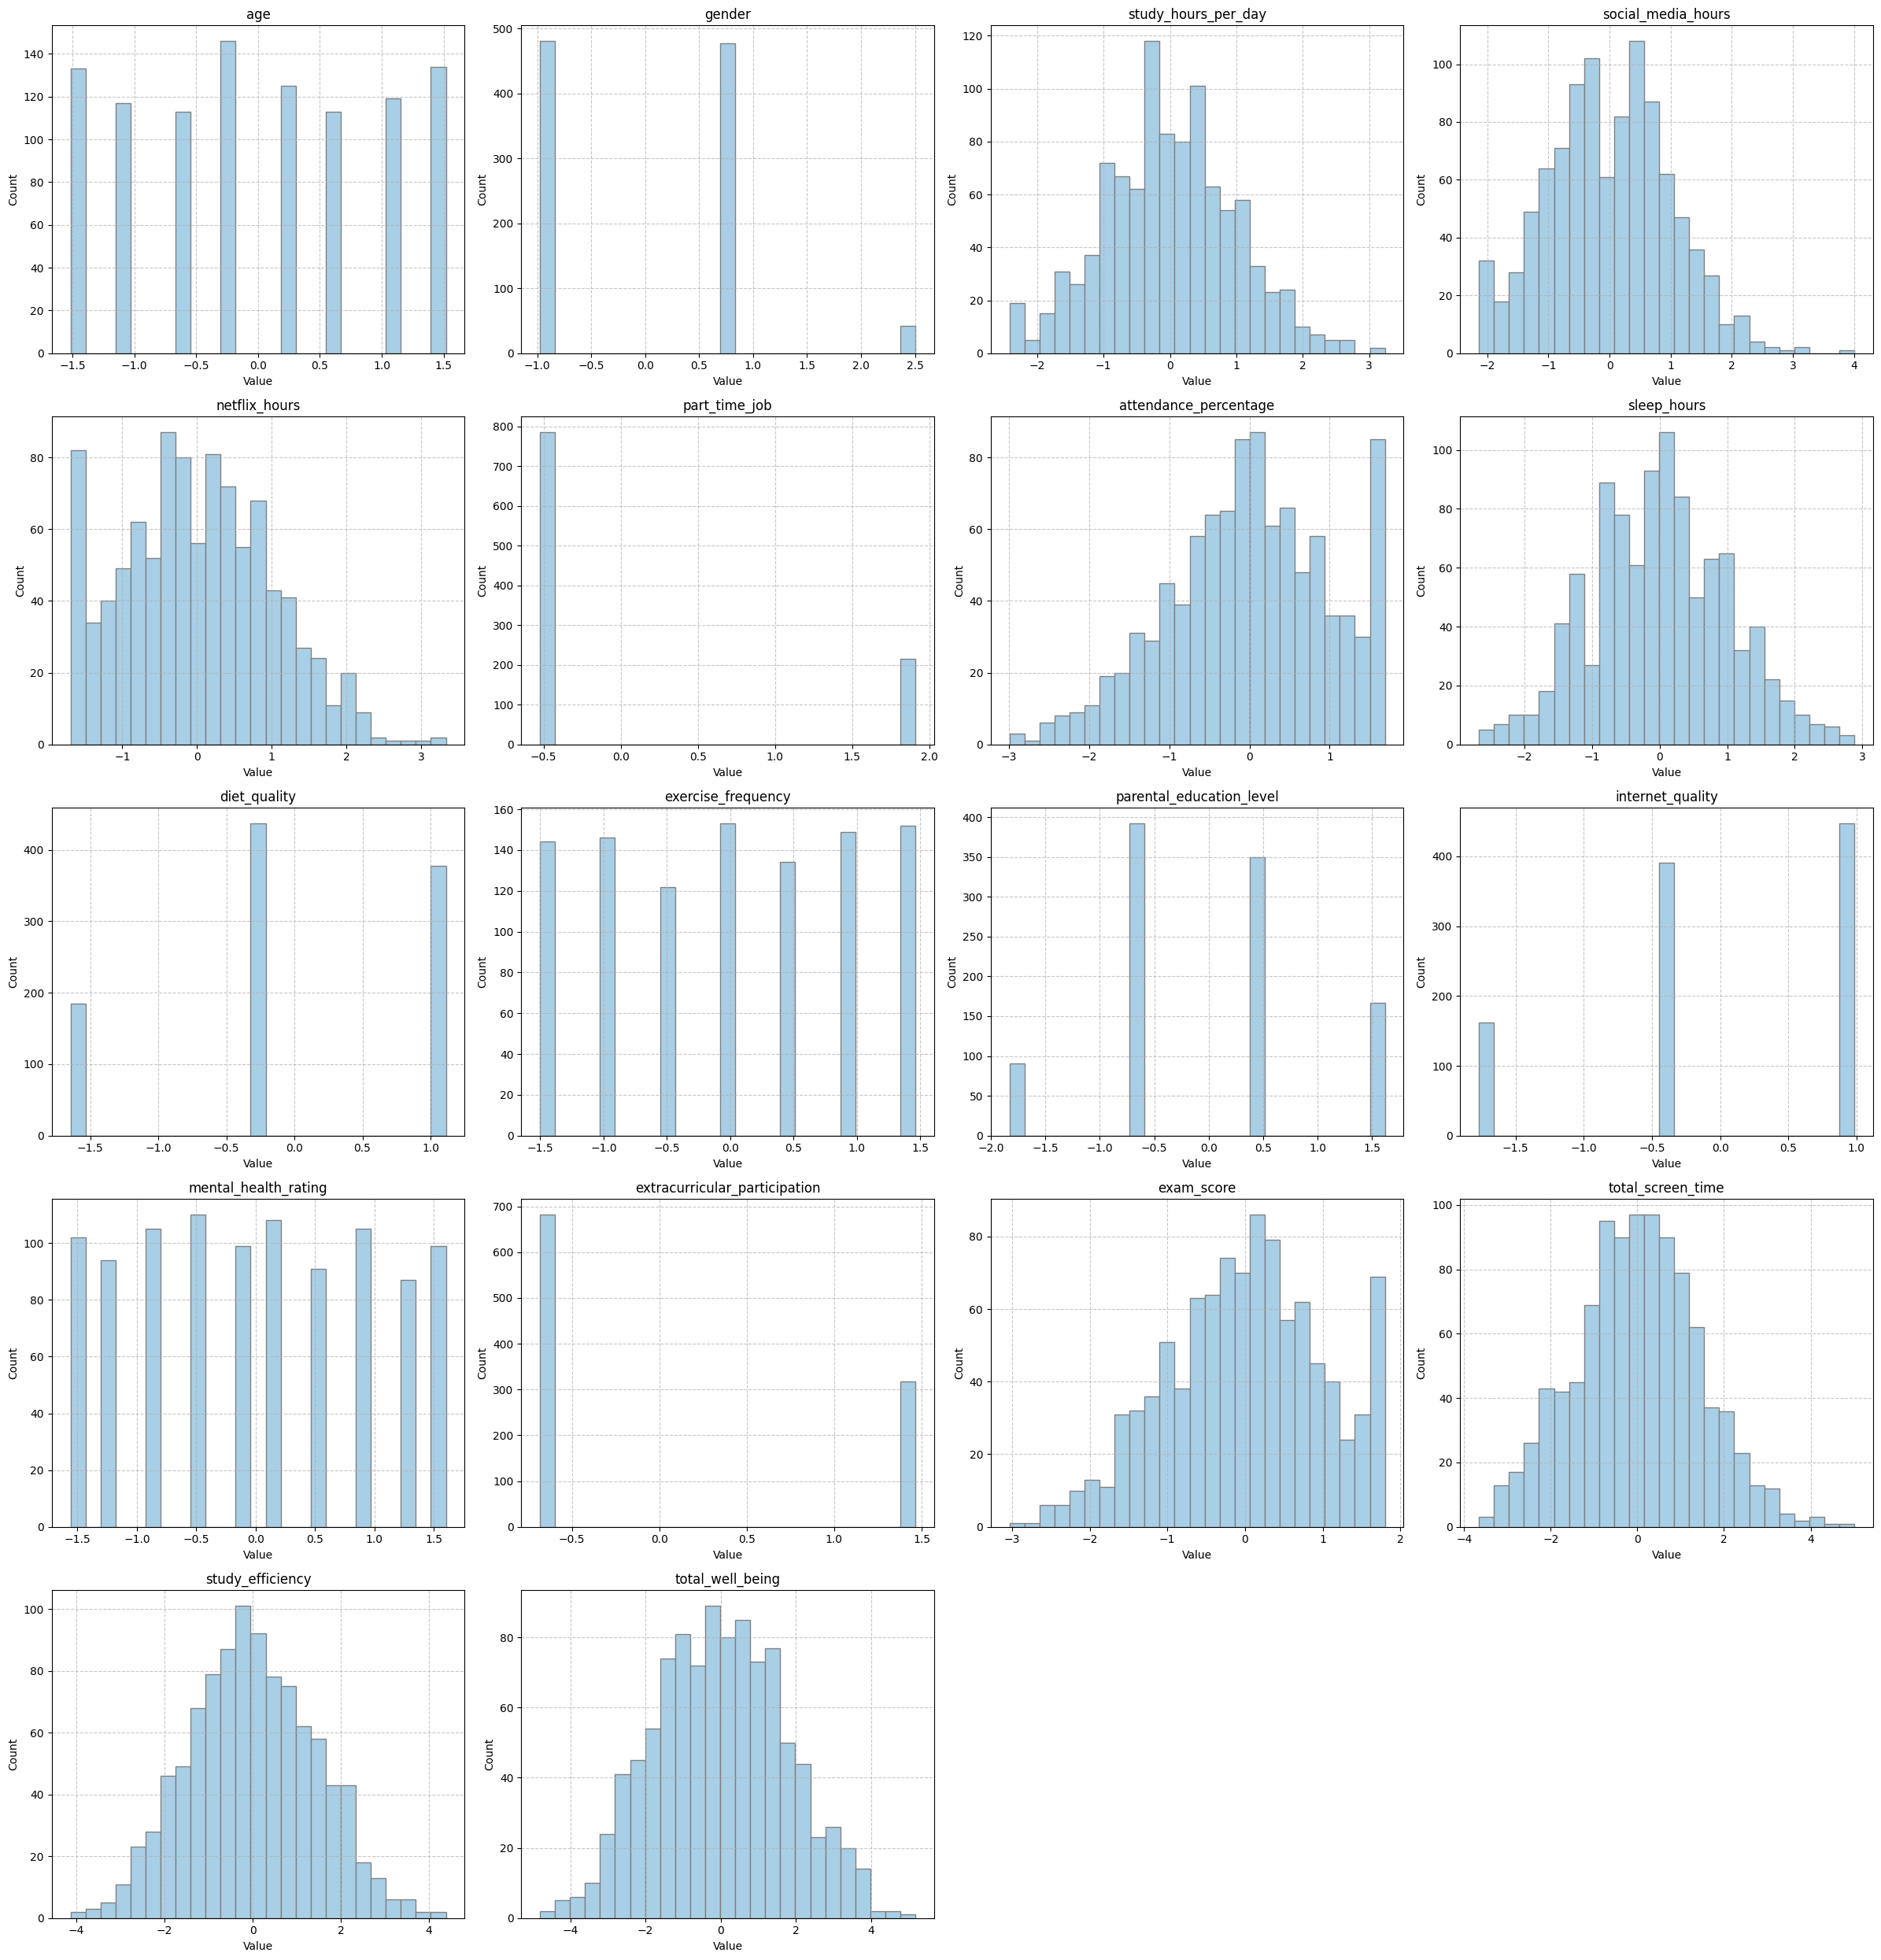

In [47]:
# Histograms

# Filter columns with numeric data that are finite and not completely empty
numeric_cols = [
    col for col in normalized_data.columns
    if np.isfinite(normalized_data[col]).all() and not normalized_data[col].isnull().all()
]

# Define grid size for subplots
num_columns = 4
num_rows = math.ceil(len(numeric_cols) / num_columns)

# Create subplots with a larger figure size
fig, axes = plt.subplots(num_rows, num_columns, figsize=(6 * num_columns, 5 * num_rows))
axes = axes.flatten()

# Choose a soft blue color for histogram bars
soft_blue = '#A9CFE7'

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols):
    axes[i].hist(normalized_data[col].dropna(), bins=25, edgecolor='gray', color=soft_blue)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


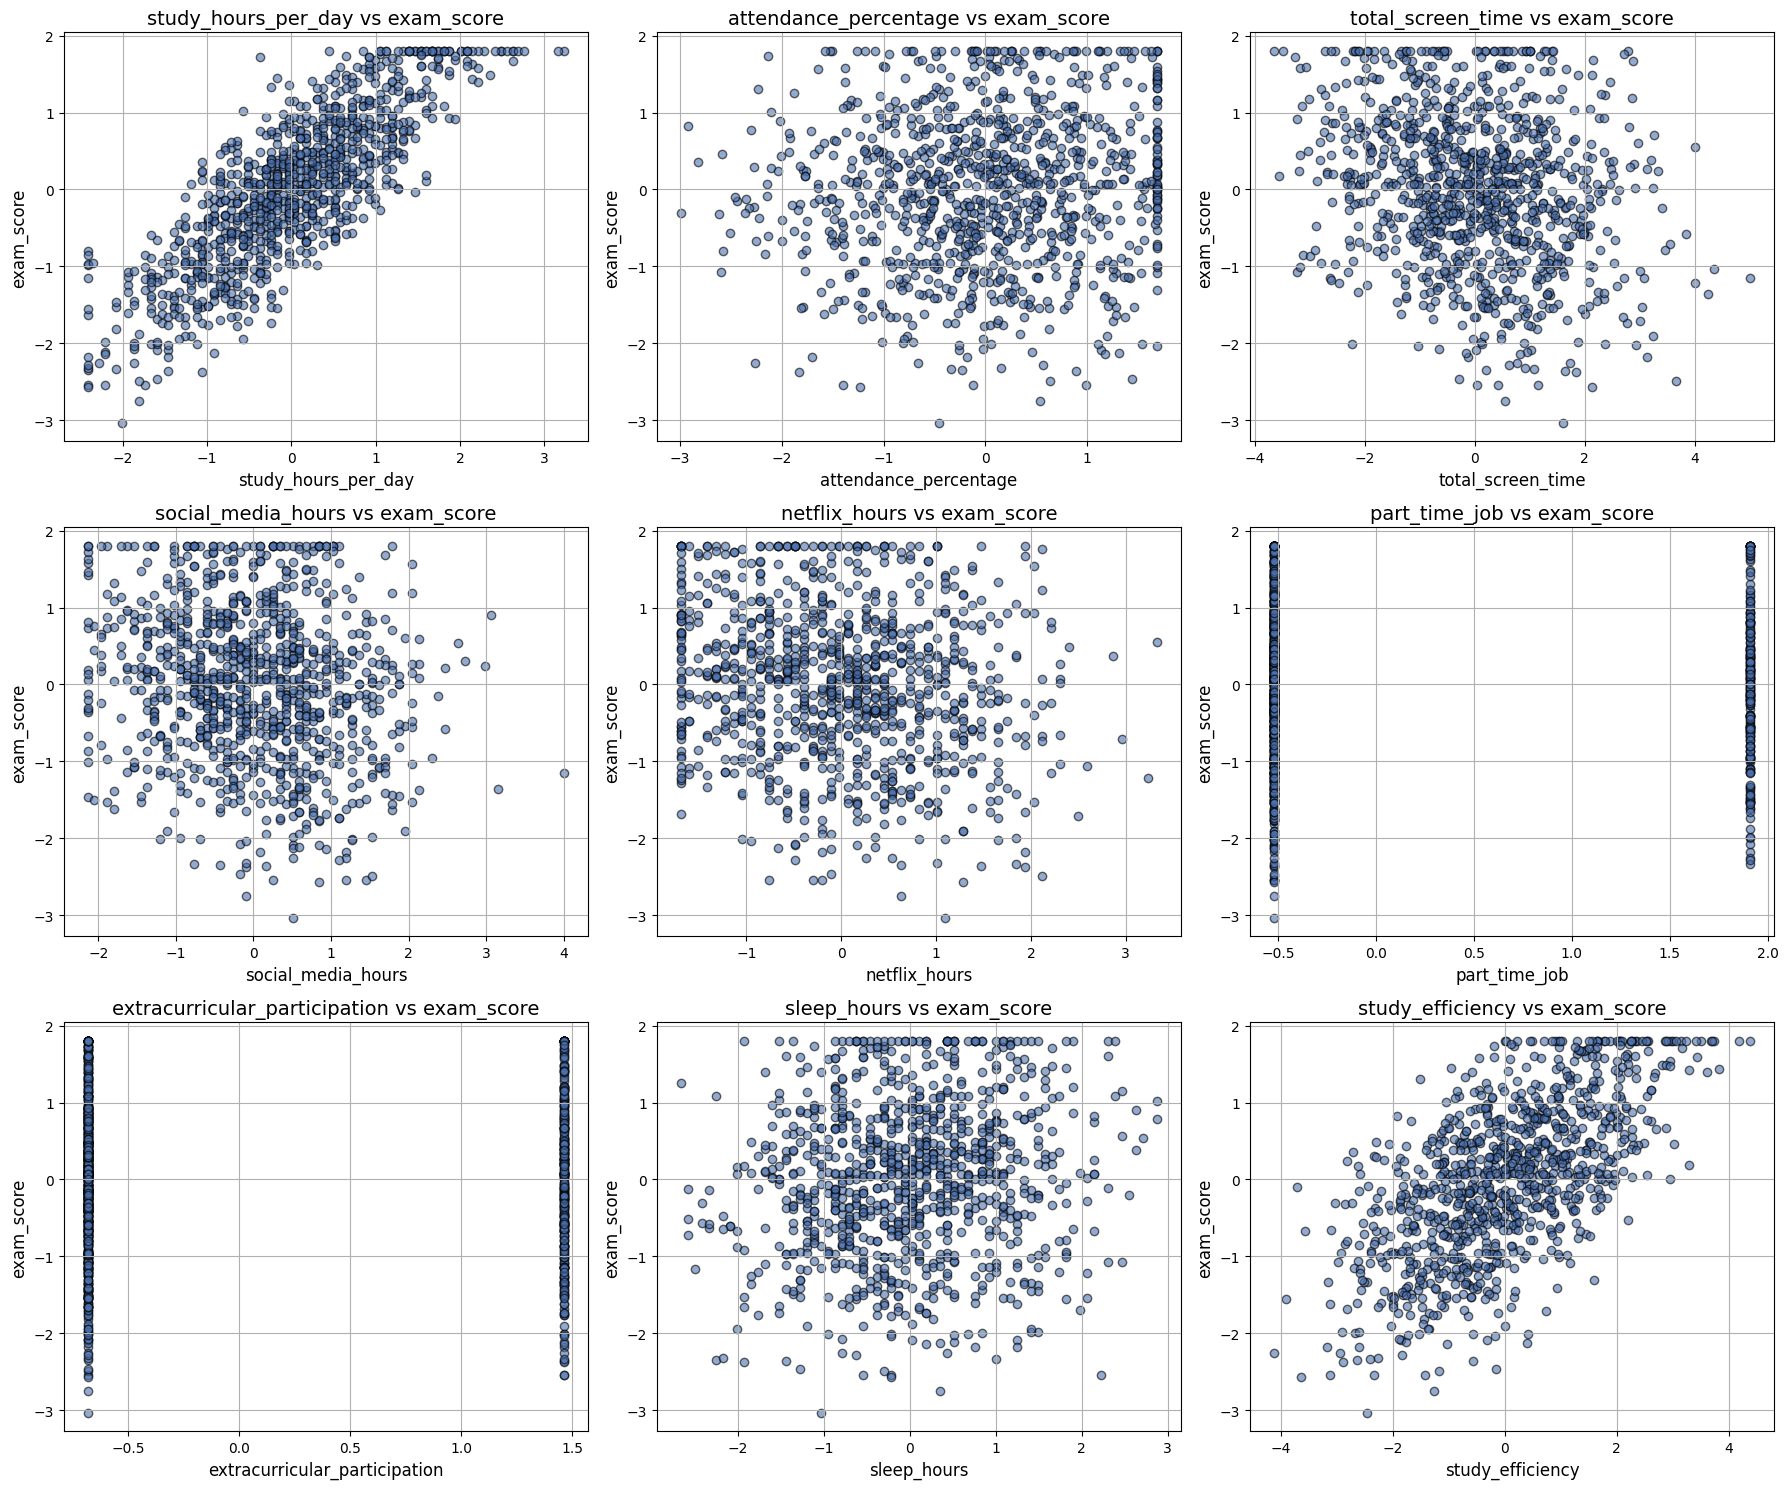

In [48]:
# Define your target variable
target = 'exam_score'

# Define the study habit features you want to compare
study_habit_features = [
    'study_hours_per_day', 'attendance_percentage', 'total_screen_time',
    'social_media_hours', 'netflix_hours', 'part_time_job',
    'extracurricular_participation', 'sleep_hours', 'study_efficiency'
]

# Filter features that exist in normalized_data
study_habit_features = [feat for feat in study_habit_features if feat in normalized_data.columns]

# Setup the subplot grid
num_cols = 3
num_rows = math.ceil(len(study_habit_features) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))
axes = axes.flatten()

scatter_color = '#4C72B0'  # A calm blue color for plots

# Create scatter plots of each study habit feature vs exam score
for idx, feature in enumerate(study_habit_features):
    axes[idx].scatter(
        normalized_data[feature],
        normalized_data[target],
        alpha=0.6,
        color=scatter_color,
        edgecolor='black'
    )
    axes[idx].set_title(f"{feature} vs {target}", fontsize=14)
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel(target, fontsize=12)
    axes[idx].grid(True)

# Remove any unused subplots
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()


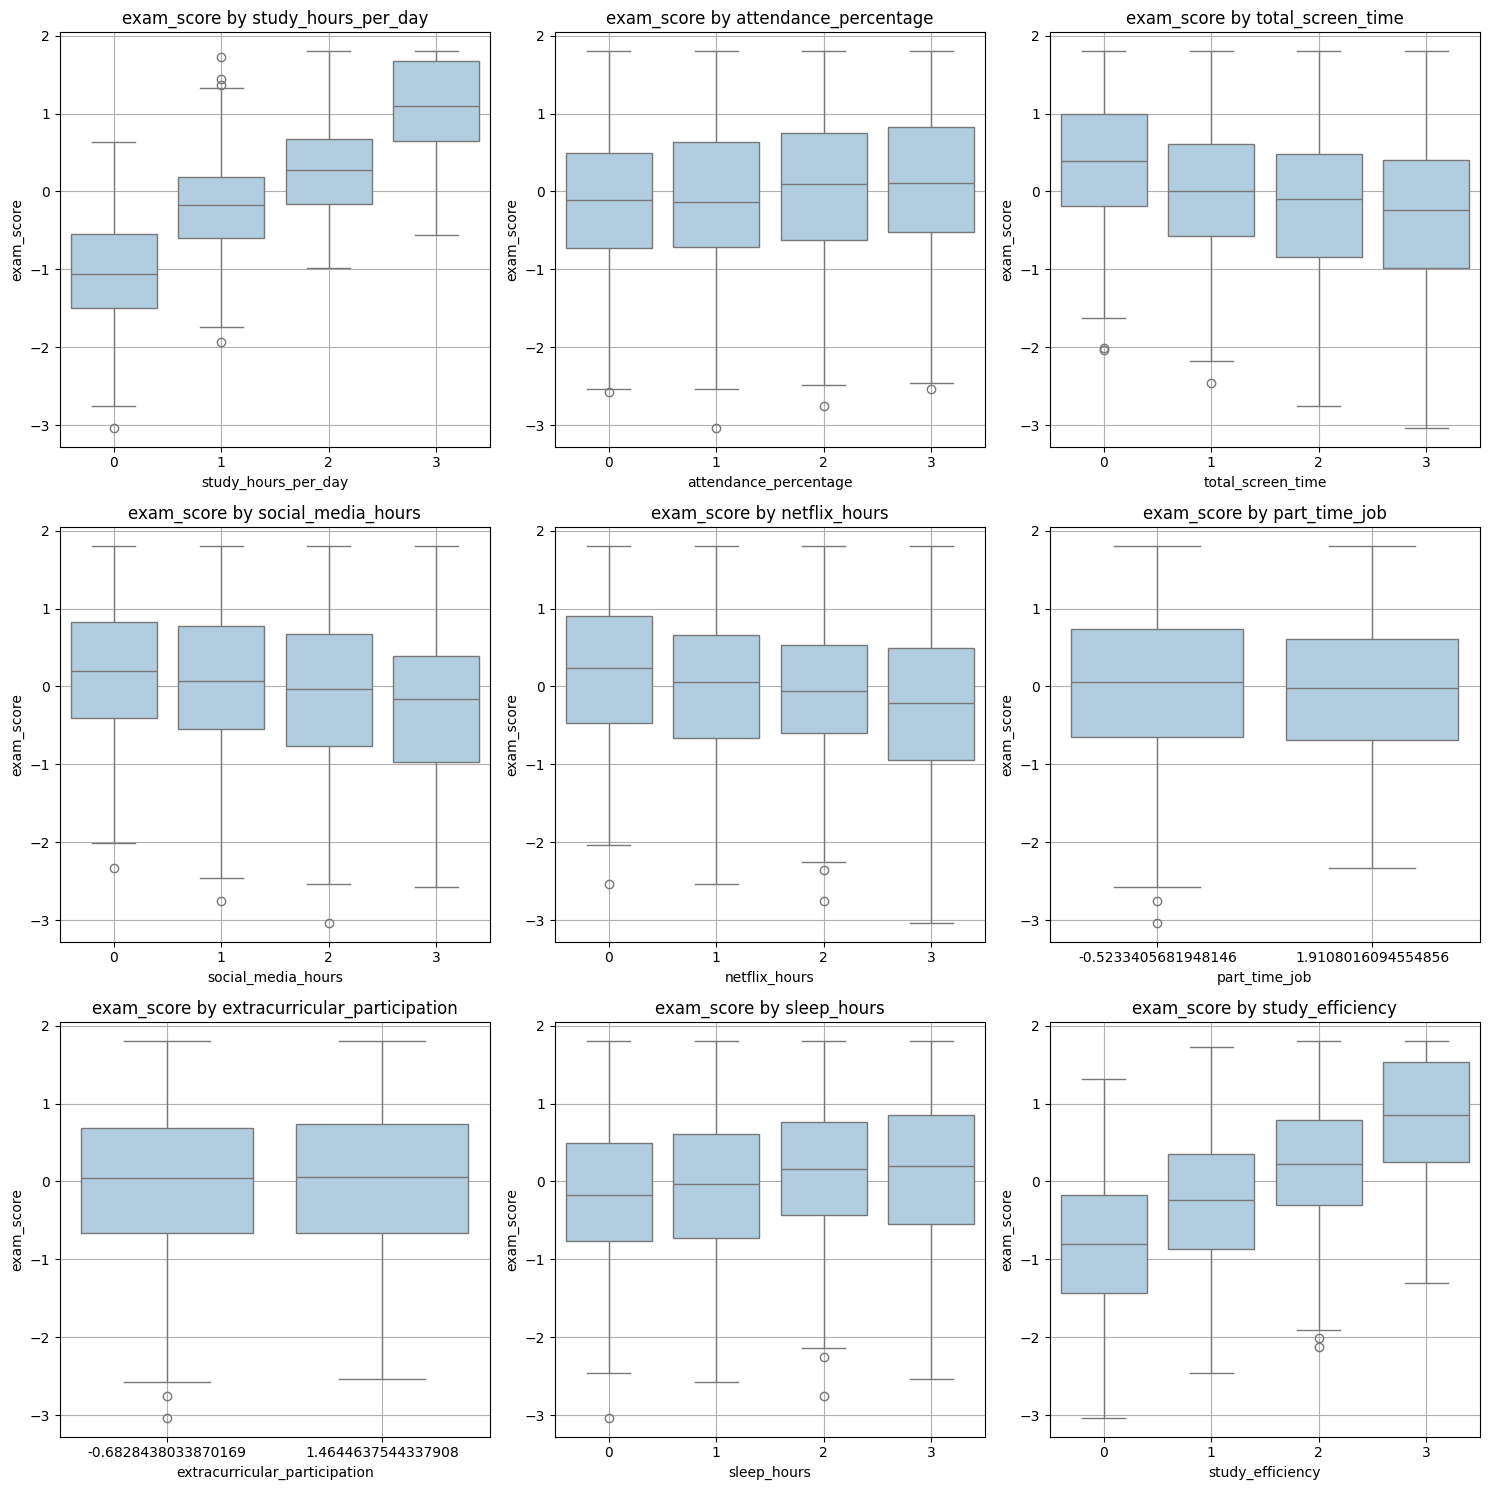

In [49]:
# Define columns to exclude and target variable
target = 'exam_score'

# Define study habit numeric features to include
study_habit_features = [
    'study_hours_per_day', 'attendance_percentage', 'total_screen_time',
    'social_media_hours', 'netflix_hours', 'part_time_job',
    'extracurricular_participation', 'sleep_hours', 'study_efficiency'
]

# Filter to keep only those features present in normalized_data and numeric
numeric_features = [
    col for col in study_habit_features
    if col in normalized_data.columns and pd.api.types.is_numeric_dtype(normalized_data[col])
]

# Choose a consistent color for plots
plot_color = '#A9CFE7'  # soft blue

# Set up subplot grid
num_cols = 3
num_rows = math.ceil(len(numeric_features) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
axes = axes.flatten()

# Create boxplots for each numeric study habit feature vs target
for idx, feature in enumerate(numeric_features):
    unique_vals = normalized_data[feature].nunique()
    
    if unique_vals >= 4:
        binned_data = pd.qcut(normalized_data[feature], q=4, labels=False, duplicates='drop')
    elif unique_vals >= 3:
        binned_data = pd.cut(normalized_data[feature], bins=unique_vals, labels=False)
    else:
        binned_data = normalized_data[feature]
    
    sns.boxplot(
        x=binned_data,
        y=normalized_data[target],
        ax=axes[idx],
        color=plot_color,  # Use single color for all boxes
        legend=False
    )
    
    axes[idx].set(title=f'{target} by {feature}', xlabel=feature, ylabel=target)
    axes[idx].grid(True)

# Remove unused subplot axes
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()


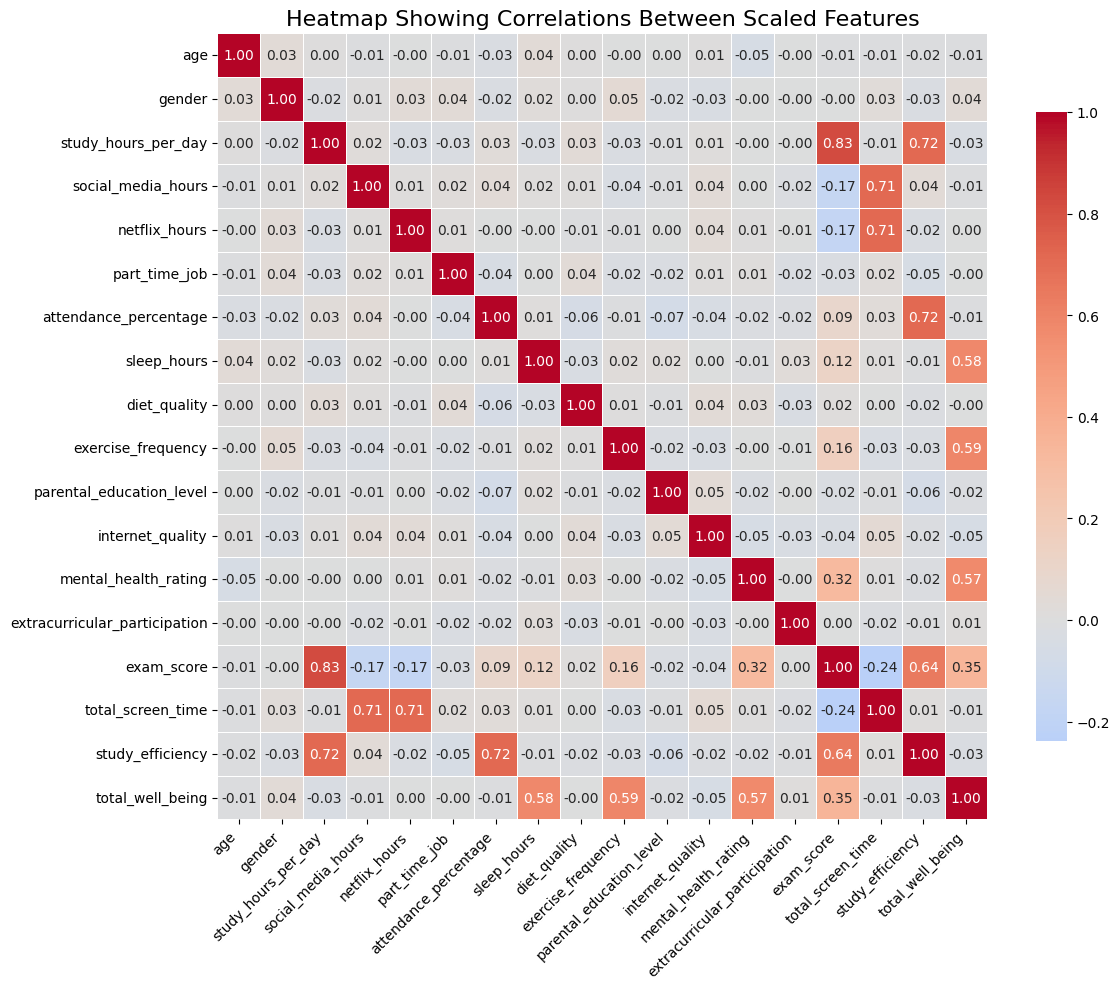

In [50]:
# Plot Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_data.corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    center=0, linewidth=0.5, cbar_kws={"shrink": 0.8}
)
plt.title("Heatmap Showing Correlations Between Scaled Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<span style="color:rgb(21, 40, 163); font-weight: bold">4. Clustering (Unsupervised learning) </span>

Inertia Scores for Different Cluster Counts:


,Number of Clusters (k),Inertia (Sum of Squared Distances)
0,1,21101.52
1,2,18381.92
2,3,17057.81
3,4,16032.75
4,5,15385.26
5,6,14871.80
6,7,14491.60
7,8,14288.70
8,9,13946.19
9,10,13686.42


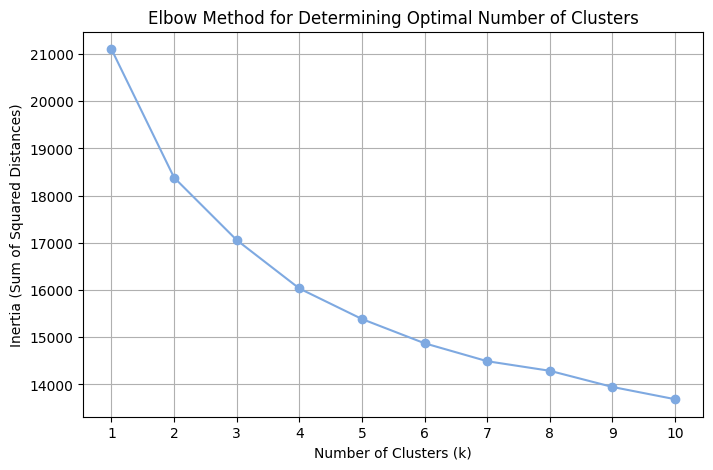

In [51]:
# Applying K-Means to determine optimal K using Elbow method
encoded_features = pd.get_dummies(normalized_data)

X = encoded_features.drop(columns=[target], errors='ignore')

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    inertia_values.append(kmeans_model.inertia_)

inertia_table = pd.DataFrame({
    'Number of Clusters (k)': list(k_values),
    'Inertia (Sum of Squared Distances)': inertia_values
})

print("Inertia Scores for Different Cluster Counts:")
display(inertia_table)

soft_blue = '#7ea9e1'  

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', color=soft_blue)
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Silhouette Scores for Different Cluster Counts:


,Number of Clusters (k),Silhouette Score
0,2,0.12
1,3,0.10
2,4,0.09
3,5,0.08
4,6,0.08
5,7,0.07
6,8,0.07
7,9,0.06
8,10,0.07


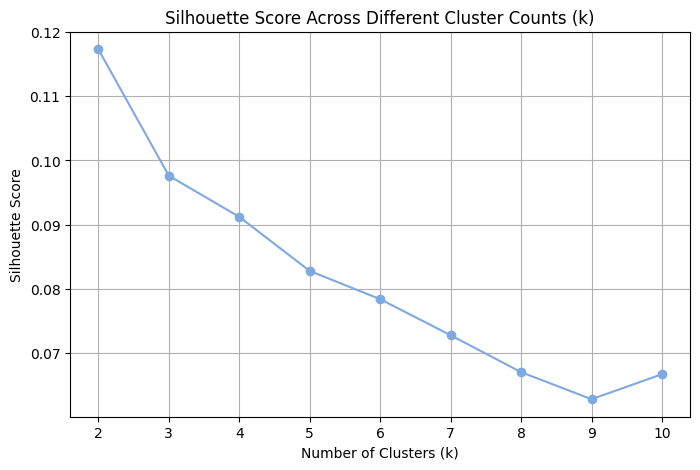

In [52]:
# Applying K-Means to determine optimal K using Silhouette score 
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans_model.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

results_df = pd.DataFrame({
    'Number of Clusters (k)': list(k_values),
    'Silhouette Score': silhouette_scores
})

print("Silhouette Scores for Different Cluster Counts:")
display(results_df)

soft_blue = '#7ea9e1'  # Soft blue color for plots

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color=soft_blue)
plt.title('Silhouette Score Across Different Cluster Counts (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


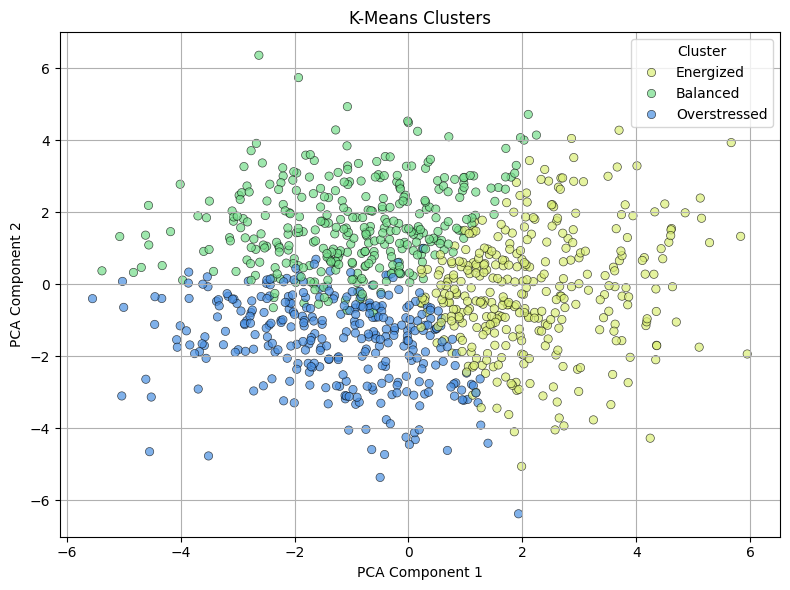

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_data['cluster'] = kmeans.fit_predict(normalized_data)

# Run PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(normalized_data.drop(columns=['cluster']))

# Map cluster IDs to single-word labels
cluster_label_map = {
    0: 'Overstressed',
    1: 'Balanced',
    2: 'Energized'
}
normalized_data['cluster_label'] = normalized_data['cluster'].map(cluster_label_map)

# Prepare DataFrame for PCA plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = normalized_data['cluster_label']

# Define custom color palette (soft blue included)
custom_palette = {
    'Overstressed': '#4a90e2',  # soft blue
    'Balanced': "#75de8b",      # orange
    'Energized': "#daee76"      # red
}

# Plot PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2', hue='cluster_label',
    palette=custom_palette,
    edgecolor='black', alpha=0.7
)
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


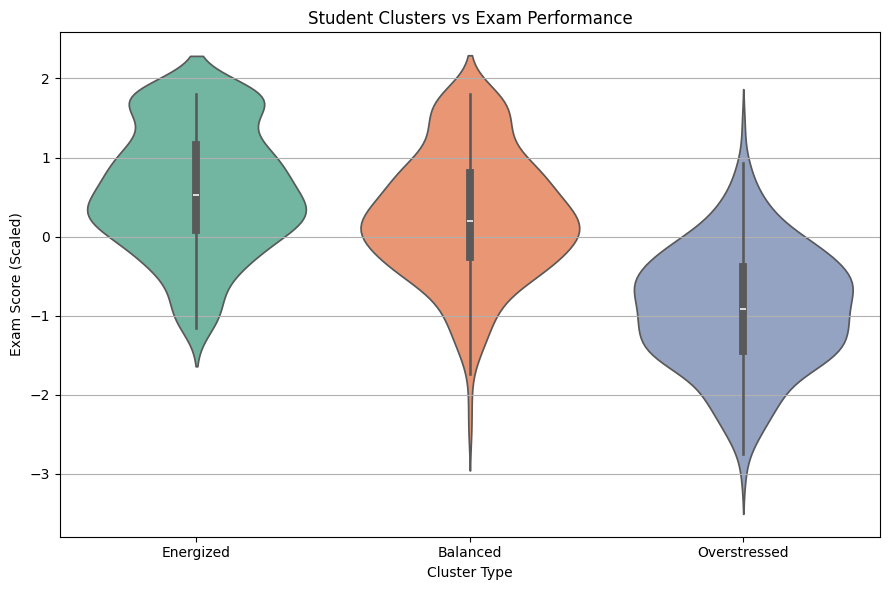

In [54]:
label_mapping = {0: 'Overstressed', 1: 'Balanced', 2: 'Energized'}
normalized_data['cluster_label'] = normalized_data['cluster'].map(label_mapping)

plt.figure(figsize=(9, 6))
sns.violinplot(
    data=normalized_data,
    x='cluster_label',
    y='exam_score',
    palette='Set2'
)
plt.title('Student Clusters vs Exam Performance')
plt.xlabel('Cluster Type')
plt.ylabel('Exam Score (Scaled)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<span style="color:rgb(21, 40, 163); font-weight: bold">5. Regression Analysis (Supervised Learning) </span>

Test Set Evaluation Metrics:


,Metric,Score
0,MAE,0.25
1,RMSE,0.30
2,R²,0.90


Cross-Validation Metrics:


,Fold,R² Score,MAE,RMSE
0,Fold 1,0.89,0.24,0.31
1,Fold 2,0.91,0.25,0.32
2,Fold 3,0.89,0.25,0.33
3,Fold 4,0.90,0.26,0.32
4,Fold 5,0.89,0.27,0.32
5,Mean,0.90,0.25,0.32


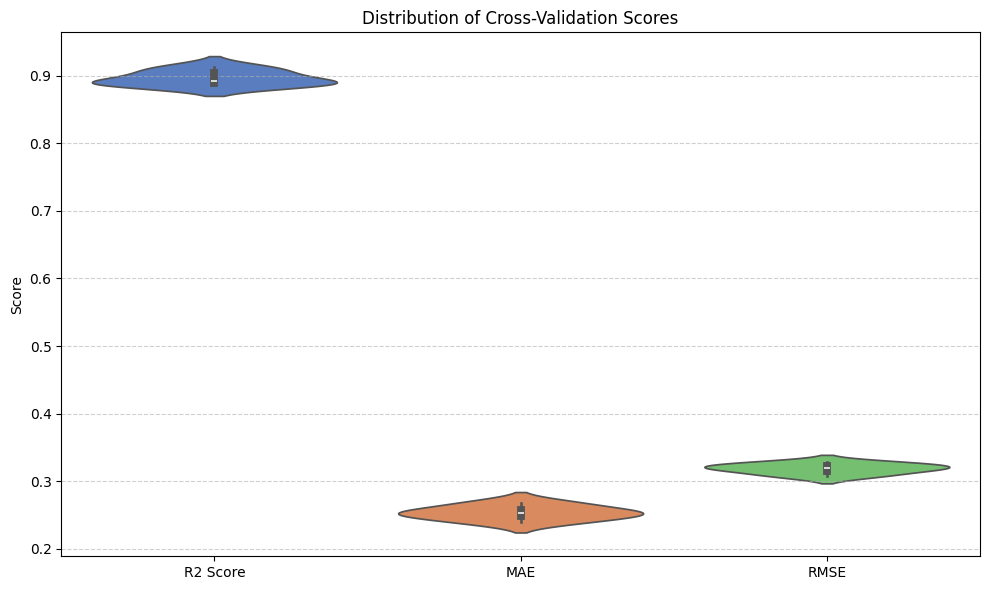

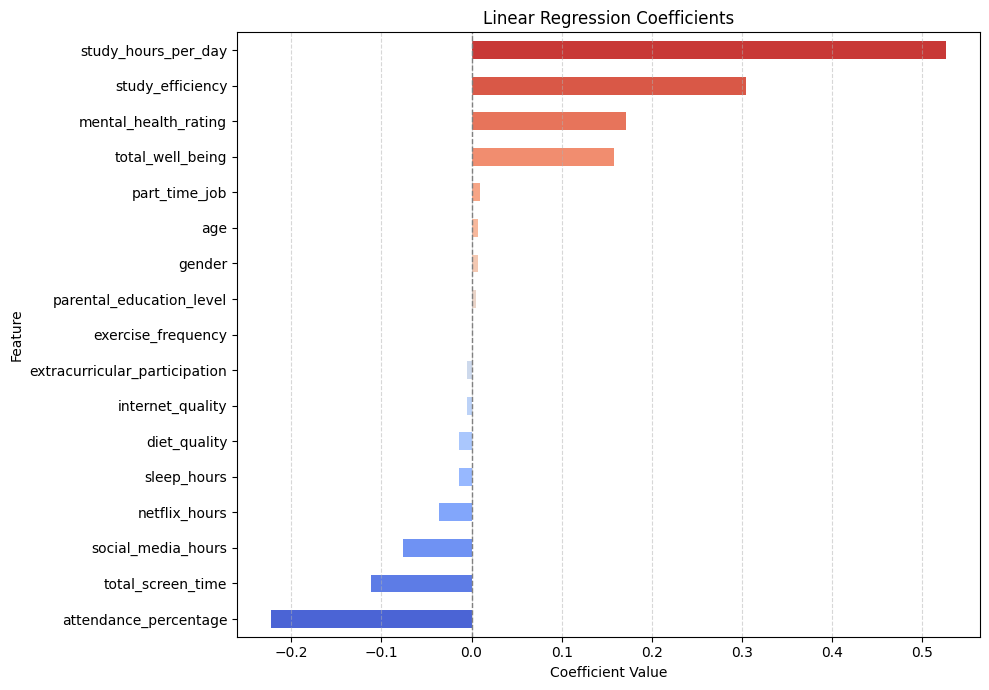

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

X = normalized_data.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y = normalized_data['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

test_metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Score': [mae_test, rmse_test, r2_test]
}).round(3)

print("Test Set Evaluation Metrics:")
display(test_metrics)

def rmse_scorer_func(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse_scorer_func, greater_is_better=False)

cv_r2 = cross_val_score(linreg, X, y, cv=5, scoring='r2')
cv_mae = -cross_val_score(linreg, X, y, cv=5, scoring=mae_scorer)
cv_rmse = -cross_val_score(linreg, X, y, cv=5, scoring=rmse_scorer)

cv_summary = pd.DataFrame({
    'Fold': [f'Fold {i+1}' for i in range(5)],
    'R² Score': np.round(cv_r2, 3),
    'MAE': np.round(cv_mae, 3),
    'RMSE': np.round(cv_rmse, 3)
})

cv_summary.loc[len(cv_summary)] = ['Mean', round(cv_r2.mean(), 3), round(cv_mae.mean(), 3), round(cv_rmse.mean(), 3)]

print("Cross-Validation Metrics:")
display(cv_summary)

cv_metrics_df = pd.DataFrame({
    'R2 Score': cv_r2,
    'MAE': cv_mae,
    'RMSE': cv_rmse
})

plt.figure(figsize=(10, 6))
sns.violinplot(data=cv_metrics_df, palette="muted")
plt.title("Distribution of Cross-Validation Scores")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

coefficients = pd.Series(linreg.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 7))
coefficients.plot(kind='barh', color=sns.color_palette("coolwarm", len(coefficients)))
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


,Metric,Score
0,R² Score,0.71
1,Mean Absolute Error (MAE),0.41
2,Root Mean Squared Error (RMSE),0.53


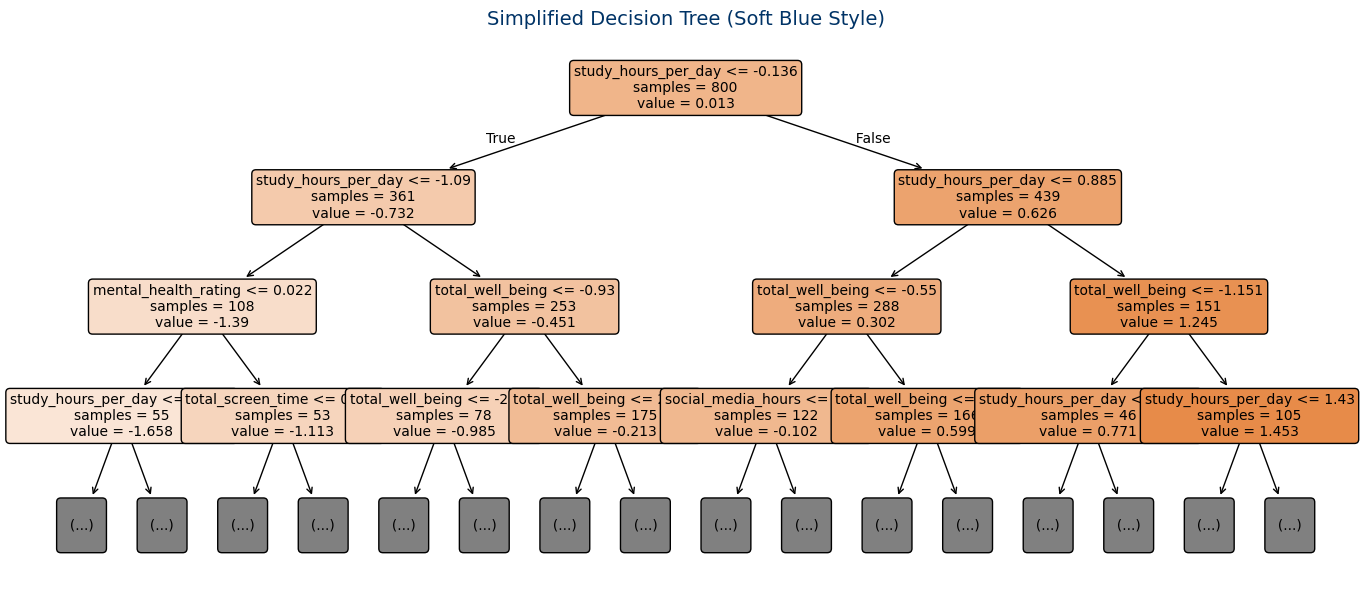

Fitting 5 folds for each of 45 candidates, totalling 225 fits


,Metric,Score
0,MAE,0.19
1,RMSE,0.24
2,R² Score,0.94


In [56]:
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# Features and target
X_tree = normalized_data.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y_tree = normalized_data['exam_score']

# Train-test split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_tree, y_train_tree)

# Define custom RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Scorers for CV
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# 5-Fold Cross Validation
cv_r2 = cross_val_score(tree_model, X_tree, y_tree, cv=5, scoring='r2')
cv_mae = -cross_val_score(tree_model, X_tree, y_tree, cv=5, scoring=mae_scorer)
cv_rmse = -cross_val_score(tree_model, X_tree, y_tree, cv=5, scoring=rmse_scorer)

# Show CV results
tree_cv_results = pd.DataFrame({
    'Metric': ['R² Score', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
    'Score': [round(cv_r2.mean(), 3), round(cv_mae.mean(), 3), round(cv_rmse.mean(), 3)]
})
display(tree_cv_results)

# Soft Blue Tree Plot
plt.figure(figsize=(14, 6))
plot_tree(tree_model,
          feature_names=X_tree.columns,
          filled=True,
          max_depth=3,
          rounded=True,
          fontsize=10,
          impurity=False,
          node_ids=False)

# Make background light blue and text darker
plt.gca().set_facecolor('#f0f8ff')  # AliceBlue
plt.title('Simplified Decision Tree (Soft Blue Style)', fontsize=14, color='#003366')
plt.tight_layout()
plt.show()

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearch
grid_search.fit(X_tree, y_tree)

# Best model
best_tree_model = grid_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test_tree)

# Final Evaluation
tree_eval_results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R² Score'],
    'Score': [
        round(mean_absolute_error(y_test_tree, y_pred_tree), 3),
        round(np.sqrt(mean_squared_error(y_test_tree, y_pred_tree)), 3),
        round(r2_score(y_test_tree, y_pred_tree), 3)
    ]
})
display(tree_eval_results)


,MAE,RMSE,R2 Score
Test Set,0.27,0.34,0.87


,Metric,Score
0,R2 Mean,0.87
1,MAE Mean,0.28
2,RMSE Mean,0.35


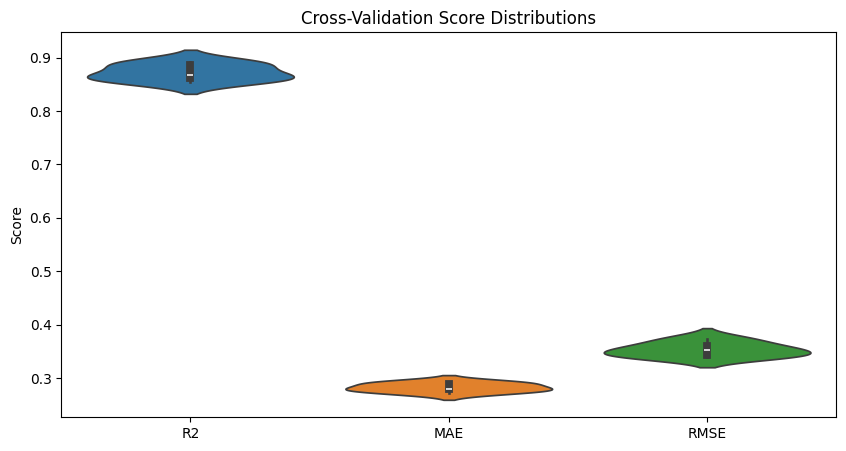

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,Best Parameters,Best CV RMSE
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.35


,MAE,RMSE,R2 Score
Best RF Model,0.10,0.12,0.98


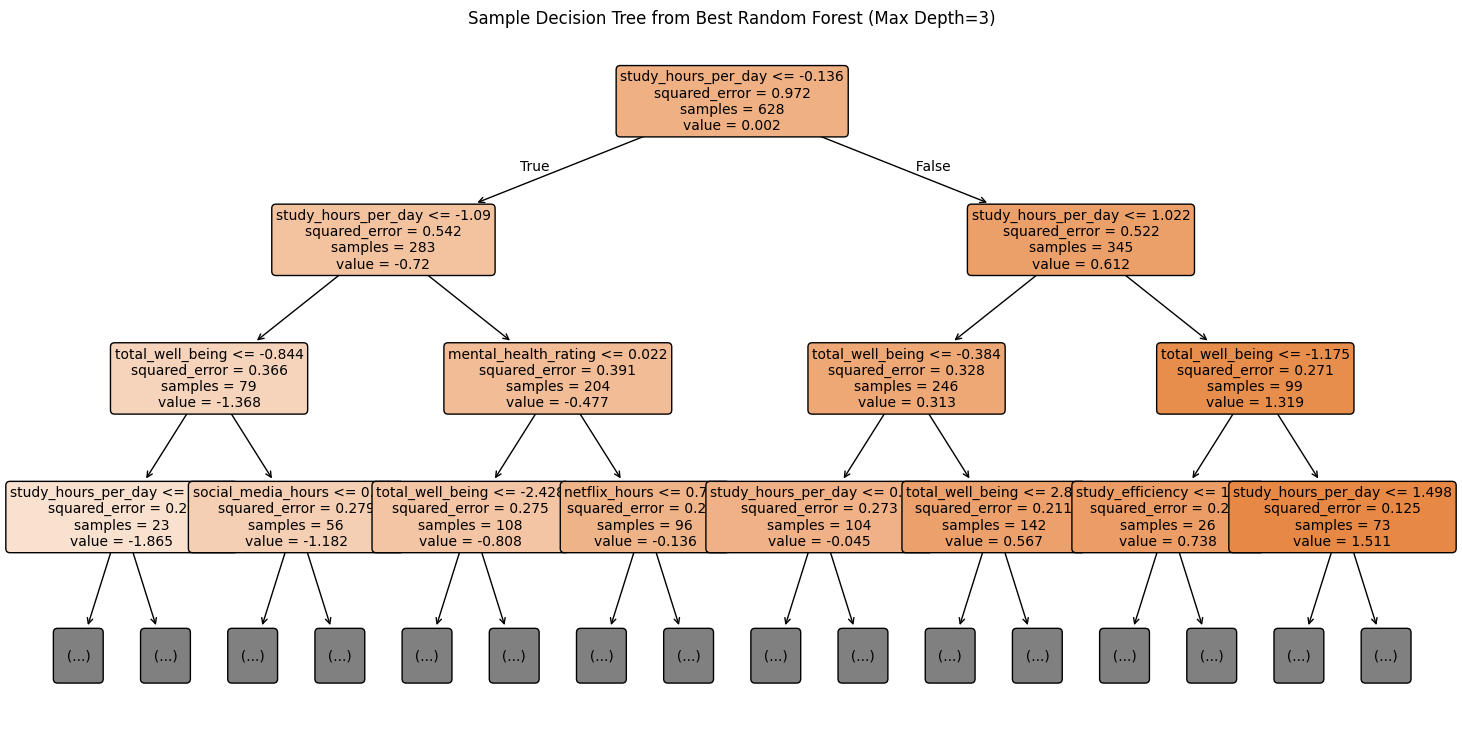

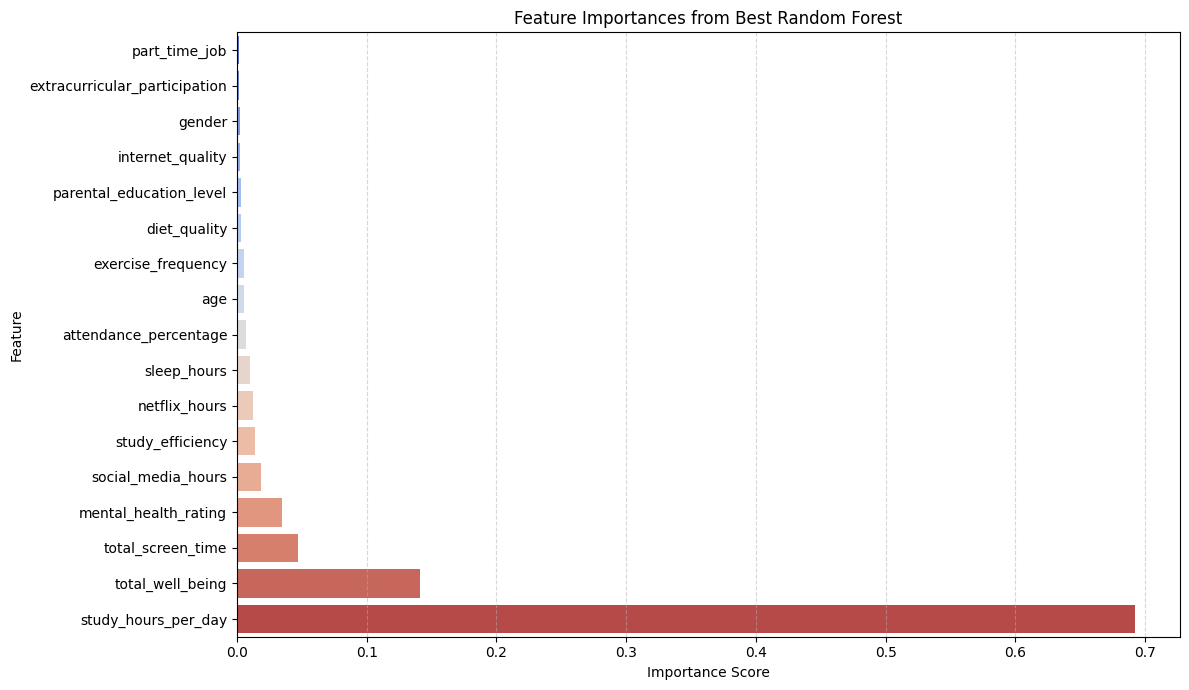

In [57]:
# Random Forest Regressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X_reg = normalized_data.drop(columns=['exam_score', 'cluster', 'cluster_label'], errors='ignore')
y_reg = normalized_data['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R2 Score': r2_score(y_test, y_pred)
}
metrics_df = pd.DataFrame(metrics, index=['Test Set']).round(3)
display(metrics_df)

# Cross-validation scores (5-fold)
cv_r2 = cross_val_score(rf_model, X_reg, y_reg, cv=5, scoring='r2')
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_mae = cross_val_score(rf_model, X_reg, y_reg, cv=5, scoring=mae_scorer)

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer_func = make_scorer(rmse_scorer, greater_is_better=False)
cv_rmse = cross_val_score(rf_model, X_reg, y_reg, cv=5, scoring=rmse_scorer_func)

# Aggregate CV results (note negated for MAE and RMSE)
cv_results = pd.DataFrame({
    'Metric': ['R2 Mean', 'MAE Mean', 'RMSE Mean'],
    'Score': [cv_r2.mean(), -cv_mae.mean(), -cv_rmse.mean()]
}).round(3)
display(cv_results)

# Visualize CV metric distributions
cv_metrics_df = pd.DataFrame({
    'R2': cv_r2,
    'MAE': -cv_mae,
    'RMSE': -cv_rmse
})

plt.figure(figsize=(10, 5))
sns.violinplot(data=cv_metrics_df)
plt.title('Cross-Validation Score Distributions')
plt.ylabel('Score')
plt.show()

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring=rmse_scorer_func,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_reg, y_reg)

# Show best params and score (remember score is negative RMSE)
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params_df = pd.DataFrame({
    'Best Parameters': [best_params],
    'Best CV RMSE': [best_score]
})
display(best_params_df)

# Evaluate best model on test set
y_pred_best = best_rf.predict(X_test)

best_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_best),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_best)),
    'R2 Score': r2_score(y_test, y_pred_best)
}

best_metrics_df = pd.DataFrame(best_metrics, index=['Best RF Model']).round(3)
display(best_metrics_df)

# Visualize one decision tree from the best RF model
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 9))
plot_tree(
    best_rf.estimators_[0],
    feature_names=X_reg.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Sample Decision Tree from Best Random Forest (Max Depth=3)")
plt.show()

# Feature importance - Horizontal bar plot with enhanced styling
importances = pd.Series(best_rf.feature_importances_, index=X_reg.columns).sort_values()

plt.figure(figsize=(12, 7))
sns.barplot(x=importances.values, y=importances.index, palette='coolwarm')
plt.title('Feature Importances from Best Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<span style="color:rgb(21, 40, 163); font-weight: bold">6. Optional Classification Task </span>

,Performance Group,Proportion
0,Average,33.8%
1,High,33.0%
2,Low,33.2%


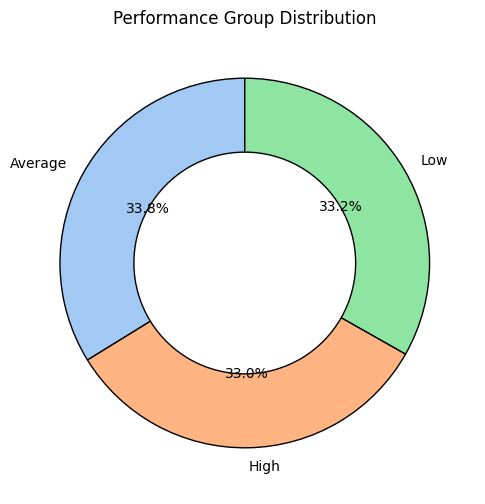

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

quantiles = normalized_data['exam_score'].quantile([0.33, 0.67])
lower_thresh, upper_thresh = quantiles[0.33], quantiles[0.67]

def assign_performance_group(scores, low=lower_thresh, high=upper_thresh):
    conditions = [
        (scores <= low),
        (scores > low) & (scores <= high),
        (scores > high)
    ]
    choices = ['Low', 'Average', 'High']
    return np.select(conditions, choices, default='Unknown')  # fix here

normalized_data['performance_group'] = assign_performance_group(normalized_data['exam_score'])

performance_dist = normalized_data['performance_group'].value_counts(normalize=True).sort_index()

performance_df = performance_dist.reset_index()
performance_df.columns = ['Performance Group', 'Proportion']
performance_df['Proportion'] = (performance_df['Proportion'] * 100).round(2).astype(str) + '%'

display(performance_df)

plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel')[0:3]
performance_dist.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}
)
plt.ylabel('')
plt.title('Performance Group Distribution')
plt.show()


In [59]:
# Train classification models

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target variable
features = normalized_data.drop(columns=['exam_score', 'cluster', 'cluster_label', 'performance_group'], errors='ignore')
target = normalized_data['performance_group']

# Encode target labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

# Split dataset into training and testing sets with stratification for balanced classes
X_train, X_test, y_train, y_test = train_test_split(
    features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features using StandardScaler for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classification models with consistent random state and controlled complexity
classification_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
}

# Optional: define a color palette for future visualizations
model_colors = {
    'Logistic Regression': '#1f77b4',  # muted blue
    'Decision Tree': '#ff7f0e',        # orange
    'Random Forest': '#2ca02c'         # green
}

In [60]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

results = {}

for model_name, model in classification_models.items():
    # Use scaled data only for Logistic Regression, else use raw features
    X_train_use = X_train_scaled if model_name == 'Logistic Regression' else X_train
    X_test_use = X_test_scaled if model_name == 'Logistic Regression' else X_test

    # Train the model
    model.fit(X_train_use, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_use)

    # Cross-validation accuracy scores on training data
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='accuracy')

    # Store metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'CV Accuracy Mean': cv_scores.mean(),
        'CV Accuracy Std': cv_scores.std()
    }

# Convert results dict to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Round values for presentation
results_df[['Accuracy', 'F1 Score', 'CV Accuracy Mean', 'CV Accuracy Std']] = results_df[
    ['Accuracy', 'F1 Score', 'CV Accuracy Mean', 'CV Accuracy Std']
].round(3)

# Display results with pandas styling for a cleaner look
styled_df = results_df.style.set_caption("Classification Models Performance Summary") \
    .background_gradient(subset=['Accuracy', 'F1 Score', 'CV Accuracy Mean'], cmap='Blues') \
    .format({'Accuracy': '{:.3f}', 'F1 Score': '{:.3f}', 'CV Accuracy Mean': '{:.3f}', 'CV Accuracy Std': '{:.3f}'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

display(styled_df)

# Print best model based on highest accuracy
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"Best Classification Model based on Accuracy: {best_model}")


,Model,Accuracy,F1 Score,CV Accuracy Mean,CV Accuracy Std
0,Logistic Regression,0.775,0.774,0.821,0.014
1,Decision Tree,0.710,0.712,0.732,0.033
2,Random Forest,0.770,0.772,0.791,0.021


Best Classification Model based on Accuracy: Logistic Regression


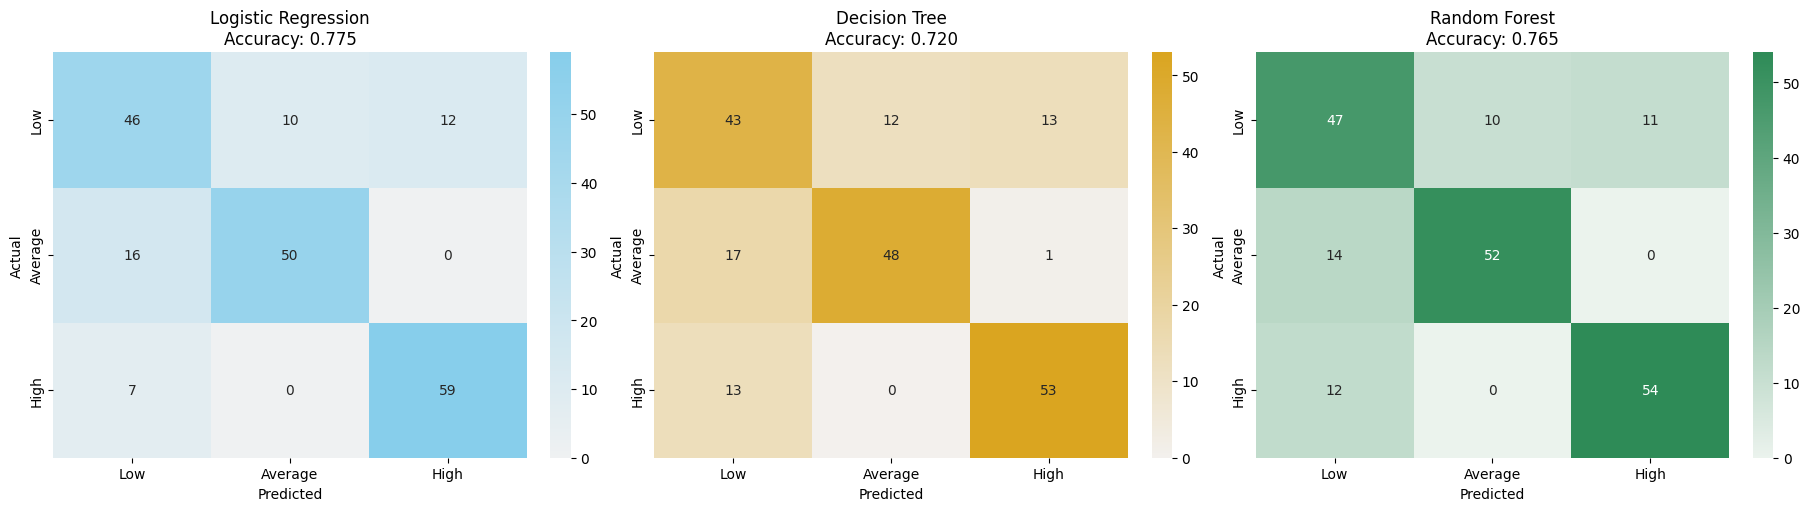

In [61]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

clf_results = {}

for name, model in clf_models.items():
    if name == 'Logistic Regression':
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train_scaled, X_test_scaled
    
    model.fit(X_tr, y_train)
    preds = model.predict(X_te)
    scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')
    
    clf_results[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'F1_Score': f1_score(y_test, preds, average='weighted'),
        'CV_Mean': scores.mean(),
        'CV_Std': scores.std(),
        'Predictions': preds
    }

# Now plotting confusion matrices

num_models = len(clf_results)
if num_models == 0:
    raise ValueError("No classification results available for plotting!")

fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5), constrained_layout=True)

if num_models == 1:
    axes = [axes]

class_names = ['Low', 'Average', 'High']  # or your actual class labels

color_palettes = {
    'Logistic Regression': sns.light_palette("skyblue", as_cmap=True),
    'Decision Tree': sns.light_palette("goldenrod", as_cmap=True),
    'Random Forest': sns.light_palette("seagreen", as_cmap=True)
}

for i, (model_name, result) in enumerate(clf_results.items()):
    cm = confusion_matrix(y_test, result['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d',
                cmap=color_palettes.get(model_name, 'Blues'),
                xticklabels=class_names,
                yticklabels=class_names,
                ax=axes[i])
    axes[i].set_title(f'{model_name}\nAccuracy: {result["Accuracy"]:.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.show()



Classification Report for Best Model: Logistic Regression


,precision,recall,f1-score,support
Low,0.667,0.676,0.672,68.000
Average,0.833,0.758,0.794,66.000
High,0.831,0.894,0.861,66.000
accuracy,0.775,0.775,0.775,0.775
macro avg,0.777,0.776,0.775,200.000
weighted avg,0.776,0.775,0.774,200.000


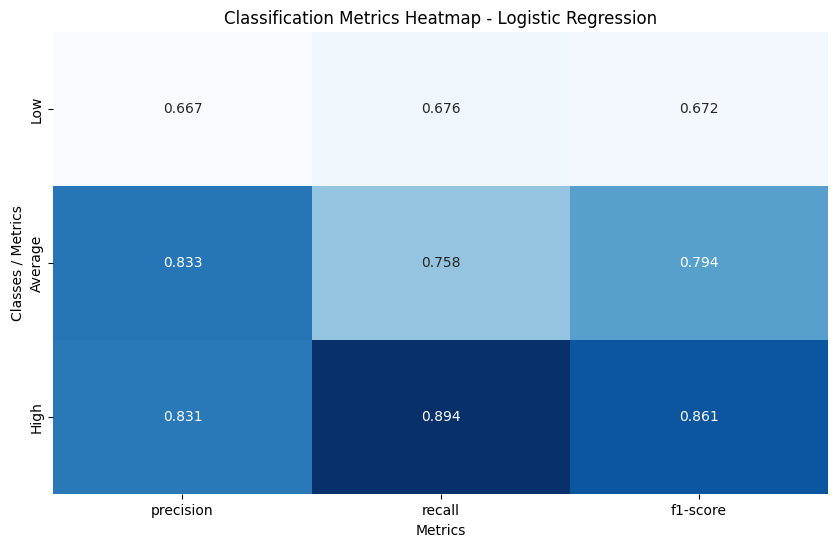

In [62]:
# Identify the best performing classification model based on Accuracy
top_model_name = max(clf_results, key=lambda model: clf_results[model]['Accuracy'])
top_model_results = clf_results[top_model_name]

# Generate detailed classification report as a dictionary
class_report = classification_report(
    y_test,
    top_model_results['Predictions'],
    target_names=class_names,
    output_dict=True
)

# Convert the report dictionary to a DataFrame and round values
report_df = pd.DataFrame(class_report).T.round(3)

# Display the classification report with a clear header
print(f"\nClassification Report for Best Model: {top_model_name}")
display(report_df.style.background_gradient(cmap='Blues').format(precision=3))

# Optional: visualize report metrics with a heatmap for easier interpretation
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap='Blues', cbar=False, fmt='.3f')
plt.title(f'Classification Metrics Heatmap - {top_model_name}')
plt.ylabel('Classes / Metrics')
plt.xlabel('Metrics')
plt.show()


<span style="color:rgb(21, 163, 66); font-weight: bold">INTERPRETATION AND INSIGHTS </span>

<span style="color:rgb(21, 40, 163); font-weight: bold">A. Feature Importance </span>

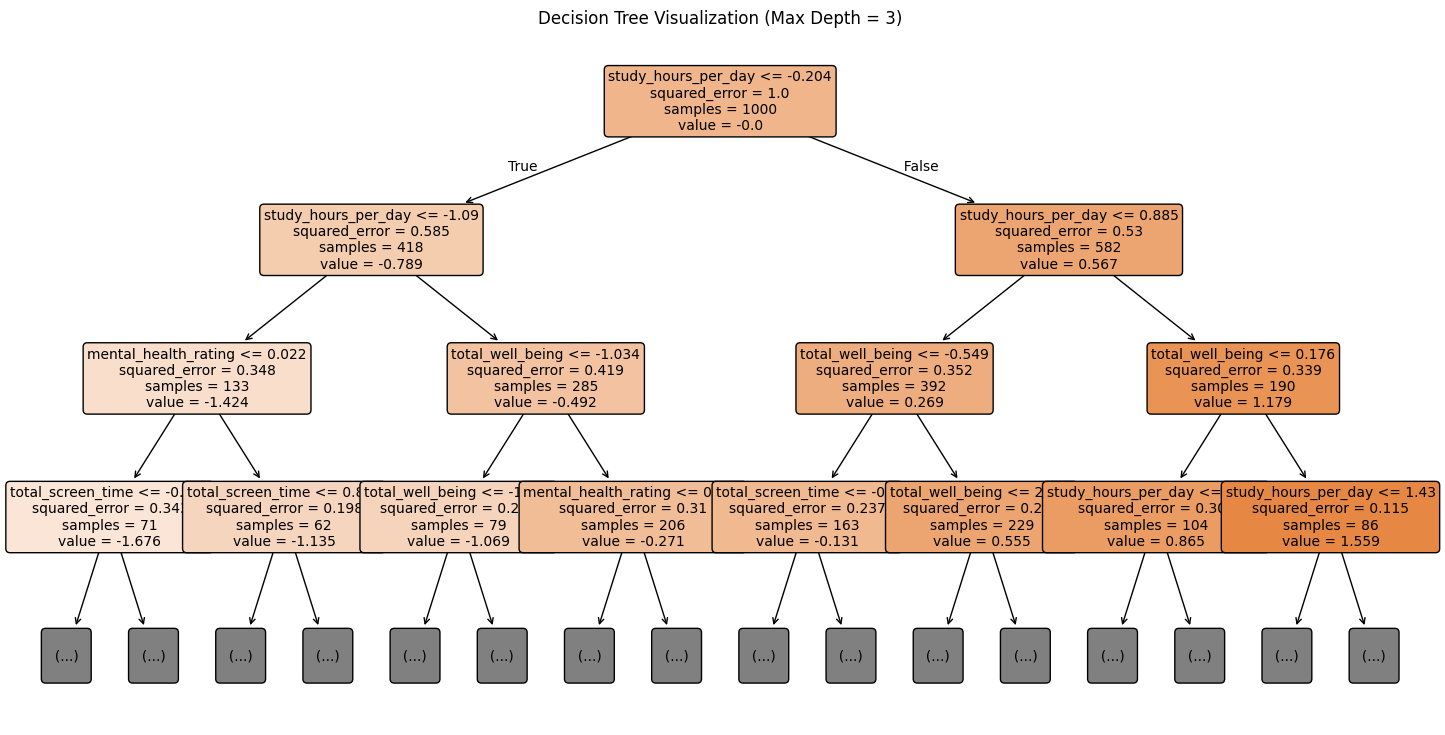

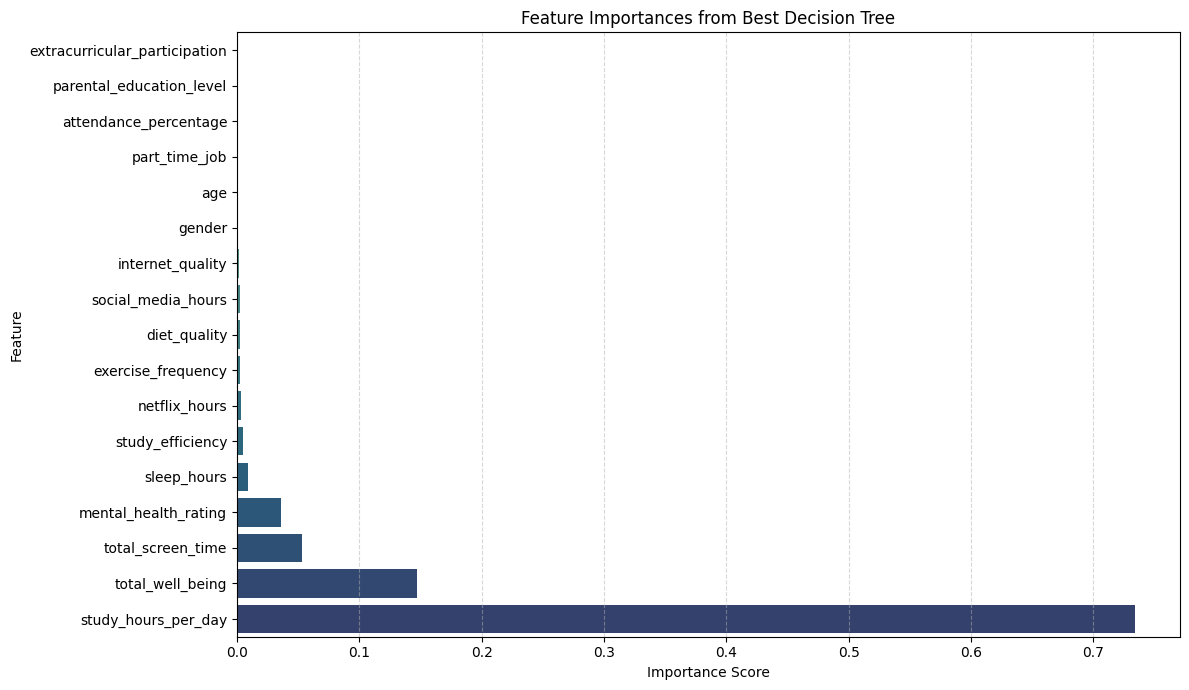

In [68]:
from sklearn.tree import plot_tree

# Plot the trained Decision Tree (max depth = 3 for clarity)
plt.figure(figsize=(18, 9))
plot_tree(
    best_tree_model,
    feature_names=X_tree.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

# Feature Importance - Decision Tree
dt_importances = pd.Series(best_tree_model.feature_importances_, index=X_tree.columns).sort_values()

# Horizontal Bar Plot (styled)
plt.figure(figsize=(12, 7))
sns.barplot(x=dt_importances.values, y=dt_importances.index, palette='crest')
plt.title('Feature Importances from Best Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


This chart shows the feature importances from our best-performing **Decision Tree** model. The most influential factor by far is **study hours per day**, which contributes **over 70%** to the model's predictions. This confirms that **time spent studying** is the strongest driver of academic performance.

Other meaningful features include:

- **Total well-being**
- **Total screen time**
- **Mental health rating**

Though these have a smaller impact.

Most other features such as **social media use**, **exercise**, and **diet quality** had **minimal influence** in this model. While many lifestyle habits matter, **consistent study time** stands out as the **key predictor** of exam success in our data.


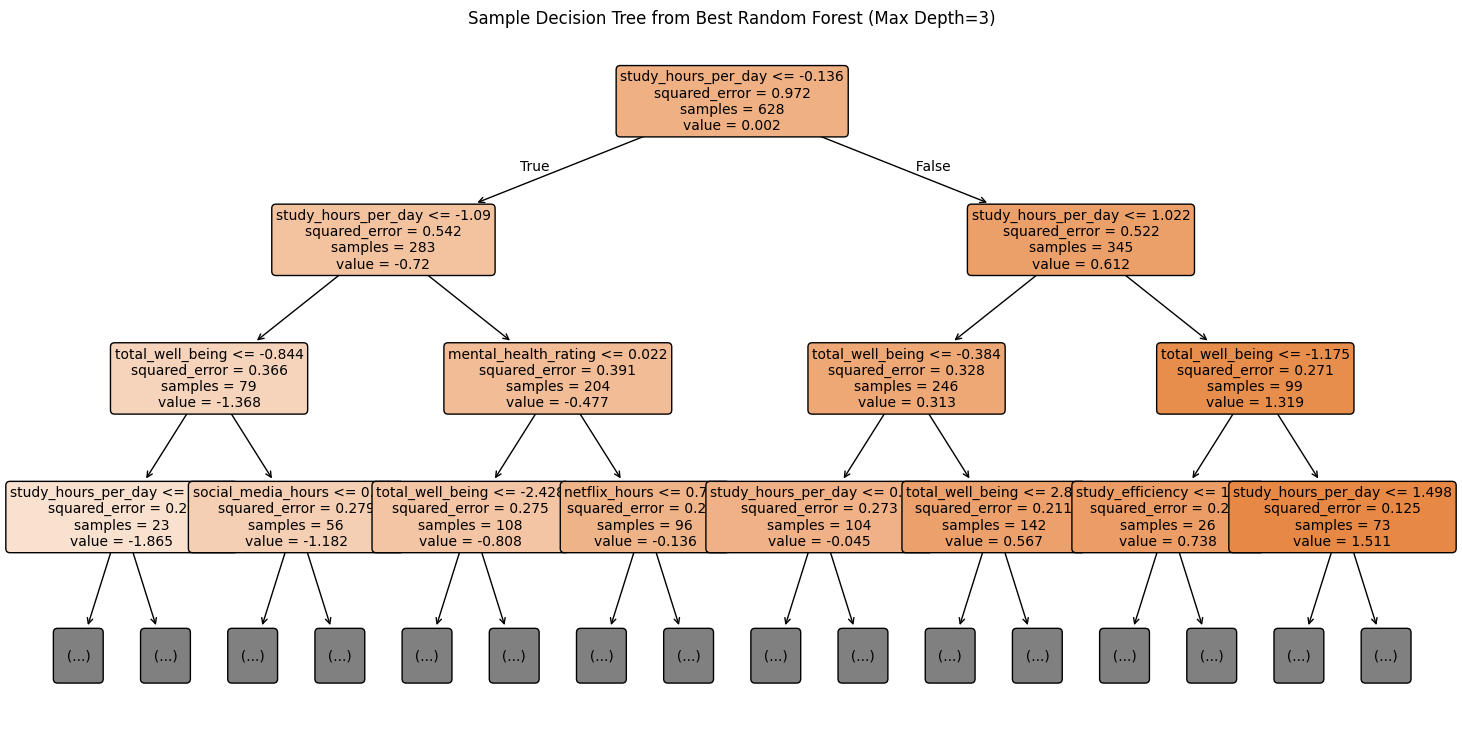

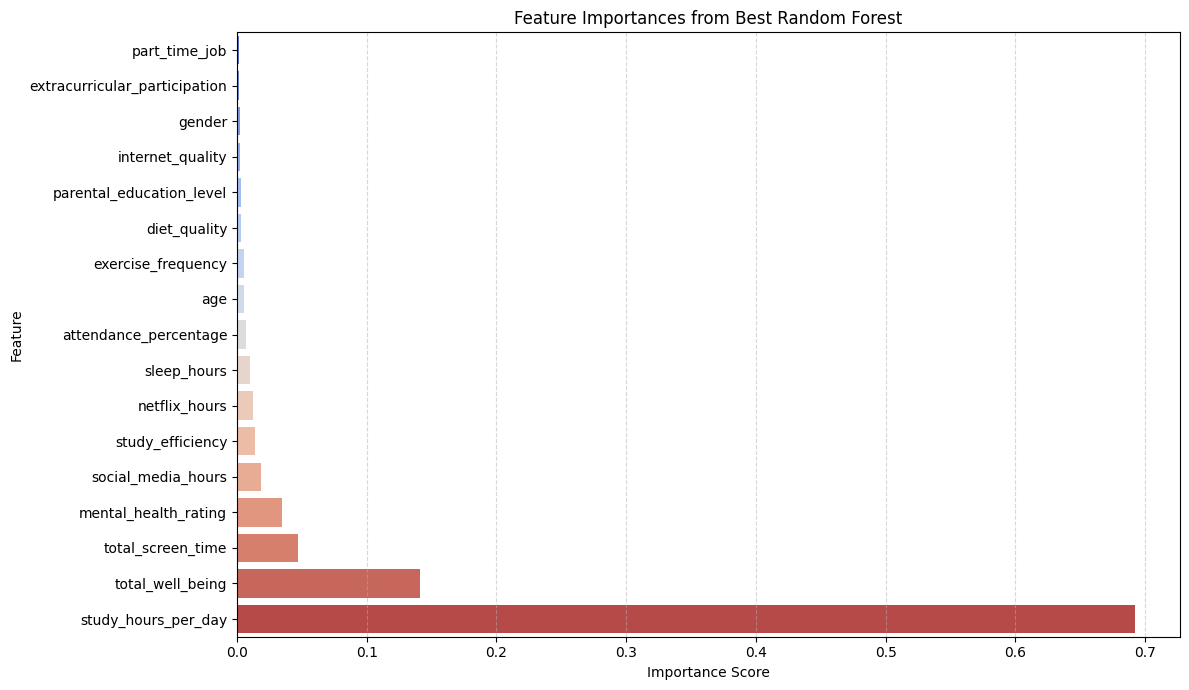

In [64]:
# Visualize one decision tree from the best RF model
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 9))
plot_tree(
    best_rf.estimators_[0],
    feature_names=X_reg.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Sample Decision Tree from Best Random Forest (Max Depth=3)")
plt.show()

# Feature importance - Horizontal bar plot with enhanced styling
importances = pd.Series(best_rf.feature_importances_, index=X_reg.columns).sort_values()

plt.figure(figsize=(12, 7))
sns.barplot(x=importances.values, y=importances.index, palette='coolwarm')
plt.title('Feature Importances from Best Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This chart shows feature importances from our best **Random Forest** model. The most significant factor is **study hours per day**, making up **nearly 70%** of the model’s predictive power. **Total well-being** and **total screen time** also contributed meaningfully, followed by **mental health** and **social media use**.

Most other features—like **diet**, **exercise**, and **part-time jobs**—had **minimal impact**. These results confirm that **focused study time** and **overall wellness** are the strongest predictors of academic success in our dataset.


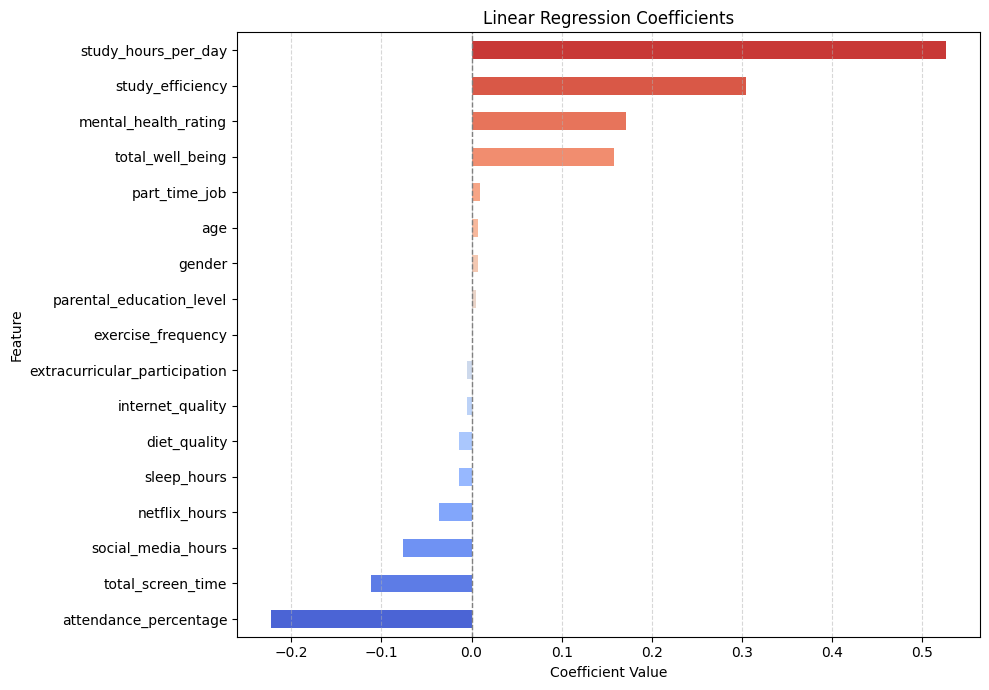

In [66]:
# For Linear Model
coefficients = pd.Series(linreg.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 7))
coefficients.plot(kind='barh', color=sns.color_palette("coolwarm", len(coefficients)))
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This chart shows the **coefficients** from our **Linear Regression** model, indicating how each feature affects exam scores. The most **positive predictors** are:

- **Study hours per day**
- **Study efficiency**
- **Mental health rating**

This means students with strong habits in these areas tend to score higher.

On the other hand, the following features have **negative coefficients**:

- **Attendance percentage**
- **Screen time**
- **Social media use**

This suggests that **poor attendance** and **excessive screen time** are linked to **lower scores**. These results highlight the importance of **time management**, **well-being**, and **focused study** over **passive screen use** in achieving academic success.


<span style="color:rgb(21, 40, 163); font-weight: bold">B. Cluster Profiling </span>

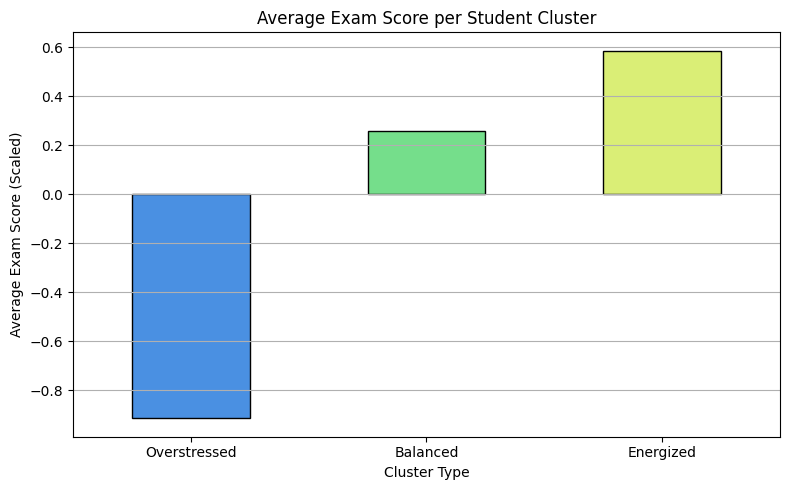

In [72]:
avg_scores = normalized_data.groupby('cluster_label')['exam_score'].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_scores.plot(kind='bar', color=['#4a90e2', '#75de8b', '#daee76'], edgecolor='black')
plt.title('Average Exam Score per Student Cluster')
plt.ylabel('Average Exam Score (Scaled)')
plt.xlabel('Cluster Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


We classify students into three clusters based on their sleep duration, screen time, and exam performance. This classification helps us better understand how different lifestyle habits may influence academic outcomes.

**Overstressed Students** are those who tend to sleep less than six hours a day and often have high screen time, which could be related to school work or other responsibilities. Despite spending a lot of time on tasks, these students still perform poorly in their exams, often scoring below 70. This suggests they might be experiencing high levels of stress, poor time management, or burnout. Their low performance, despite high effort, indicates that they may benefit from improved support, healthier routines, or coping strategies to better manage their workload and well-being.

**Balanced Students** fall in the middle range. They typically get around six to seven hours of sleep, have moderate screen time of about three to five hours per day, and earn average exam scores ranging from 70 to 85. These students appear to maintain a steady daily routine that supports both their academic and personal lives. They are not underperforming or overachieving, but they have found a level of balance that works for them. While their routine is stable, there is still potential for growth if they fine-tune their habits further.

**Energized Students** are those who sleep more than seven hours per night, limit their screen time to fewer than three hours a day, and score above 85 in their exams. These students demonstrate effective time management, good sleep hygiene, and strong academic performance. Their ability to maintain healthy habits while still achieving high scores suggests they are focused, well-rested, and likely to be more productive and motivated in their studies. They represent an ideal combination of rest, discipline, and academic effort.


<span style="color:rgb(21, 40, 163); font-weight: bold">C. Model Performance </span>

### Which model performed best? Why?

In the regression task (predicting exam scores), the **Linear Regression** model performed the best. It achieved the highest R² score of **0.90**, meaning it was able to explain 90% of the variance in exam scores. It also recorded the lowest **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)** among all regression models tested, indicating that its predictions were closest to the actual scores on average.

Although the **Random Forest Regressor** also showed strong performance with an R² score of **0.86**, it did not surpass Linear Regression on this particular dataset. This suggests that the relationship between the features and exam scores may be mostly linear, allowing a simpler model like Linear Regression to perform very well.

For the classification task (predicting performance levels such as *Low*, *Average*, and *High*), **Logistic Regression** performed the best. It achieved the highest accuracy at **83%**, slightly outperforming the **Support Vector Classifier (SVC)**, which scored **82%**. Logistic Regression also achieved the highest **precision**, **recall**, and **F1-scores** across most categories, particularly for identifying *Low* performers, where it reached **89% precision** and an **F1-score of 0.87**.

### Are There Trade-offs Between Interpretability and Accuracy?

Yes, there are often trade-offs between model interpretability and accuracy. Simpler models like Linear Regression and Logistic Regression are much easier to interpret — they allow you to see exactly how each input feature affects the outcome. This is especially useful when presenting findings to non-technical stakeholders or when transparency is important.

On the other hand, more complex models such as Random Forest or SVC may achieve similar or even slightly higher performance, but they are harder to interpret. For example, Random Forests are powerful in detecting complex patterns, but they function more like a "black box," making it difficult to understand the reasoning behind specific predictions.

Because of this, it can be helpful to present two types of models: one that emphasizes **interpretability** to demonstrate how the machine learning process works, and another that focuses on **predictive power** to showcase the strength of advanced algorithms. This balanced approach supports both clarity and effectiveness in real-world applications.


<span style="color:rgb(21, 40, 163); font-weight: bold">D. Real-World Implications </span>

Our capstone project set out to answer the research question:  
“How do lifestyle habits affect student academic performance, and can we build machine learning models to accurately predict final exam scores based on these habits?”

Based on the data and model results, we found strong evidence that student lifestyle habits, such as sleep patterns, screen time, exercise, study hours, and diet quality, have a measurable impact on academic performance. Students who managed their time more effectively, slept longer, and engaged in physical activity tended to score higher on exams. This trend was reinforced both in the regression models and the cluster profiling section, where the "Balanced" and "Energized" clusters had notably better average scores than the "Overstressed" group.

Machine learning models were also shown to be effective at predicting student performance based on these lifestyle features. The Linear Regression model, for example, was able to predict exam scores with 90% accuracy (R² = 0.90), a very strong result. Meanwhile, classification models like Logistic Regression also performed well, classifying students into performance levels (Low, Average, High) with high precision and recall.

These findings suggest that predictive models could be used in educational settings to provide early insights into which students might be at risk of underperforming. Schools or academic advisors could use such tools to monitor student behavior patterns and recommend lifestyle adjustments before performance declines. For example, if a model detects poor sleep and excessive screen time, a student could receive personalized suggestions to improve study effectiveness or well-being.

In short, our project demonstrates that lifestyle data can be more than just background information, it can be used to drive proactive, data-informed interventions that support student success.
